<a href="https://colab.research.google.com/github/harshitsaini17/Bigram/blob/main/bigram1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Names.csv")
Names = ([name for name in df["Name"].values])

In [ ]:
Names[:5]

['Aaban', 'Aabharan', 'Aabhas', 'Aabhat', 'Aabheer']

In [ ]:
characters = list(set("".join(Names).lower()))
characters.sort()
characters.insert(0,".")
itos = dict(enumerate(characters))
stoi = {v:k for (k,v) in itos.items()}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [ ]:

N = torch.ones((27,27),dtype=torch.int32)
for word in Names[:]:
  word = "."+word.lower()+"."
  for ch1, ch2 in zip(word, word[1:]):
    ix = stoi[ch1]
    iy = stoi[ch2]
    N[ix,iy] += 1

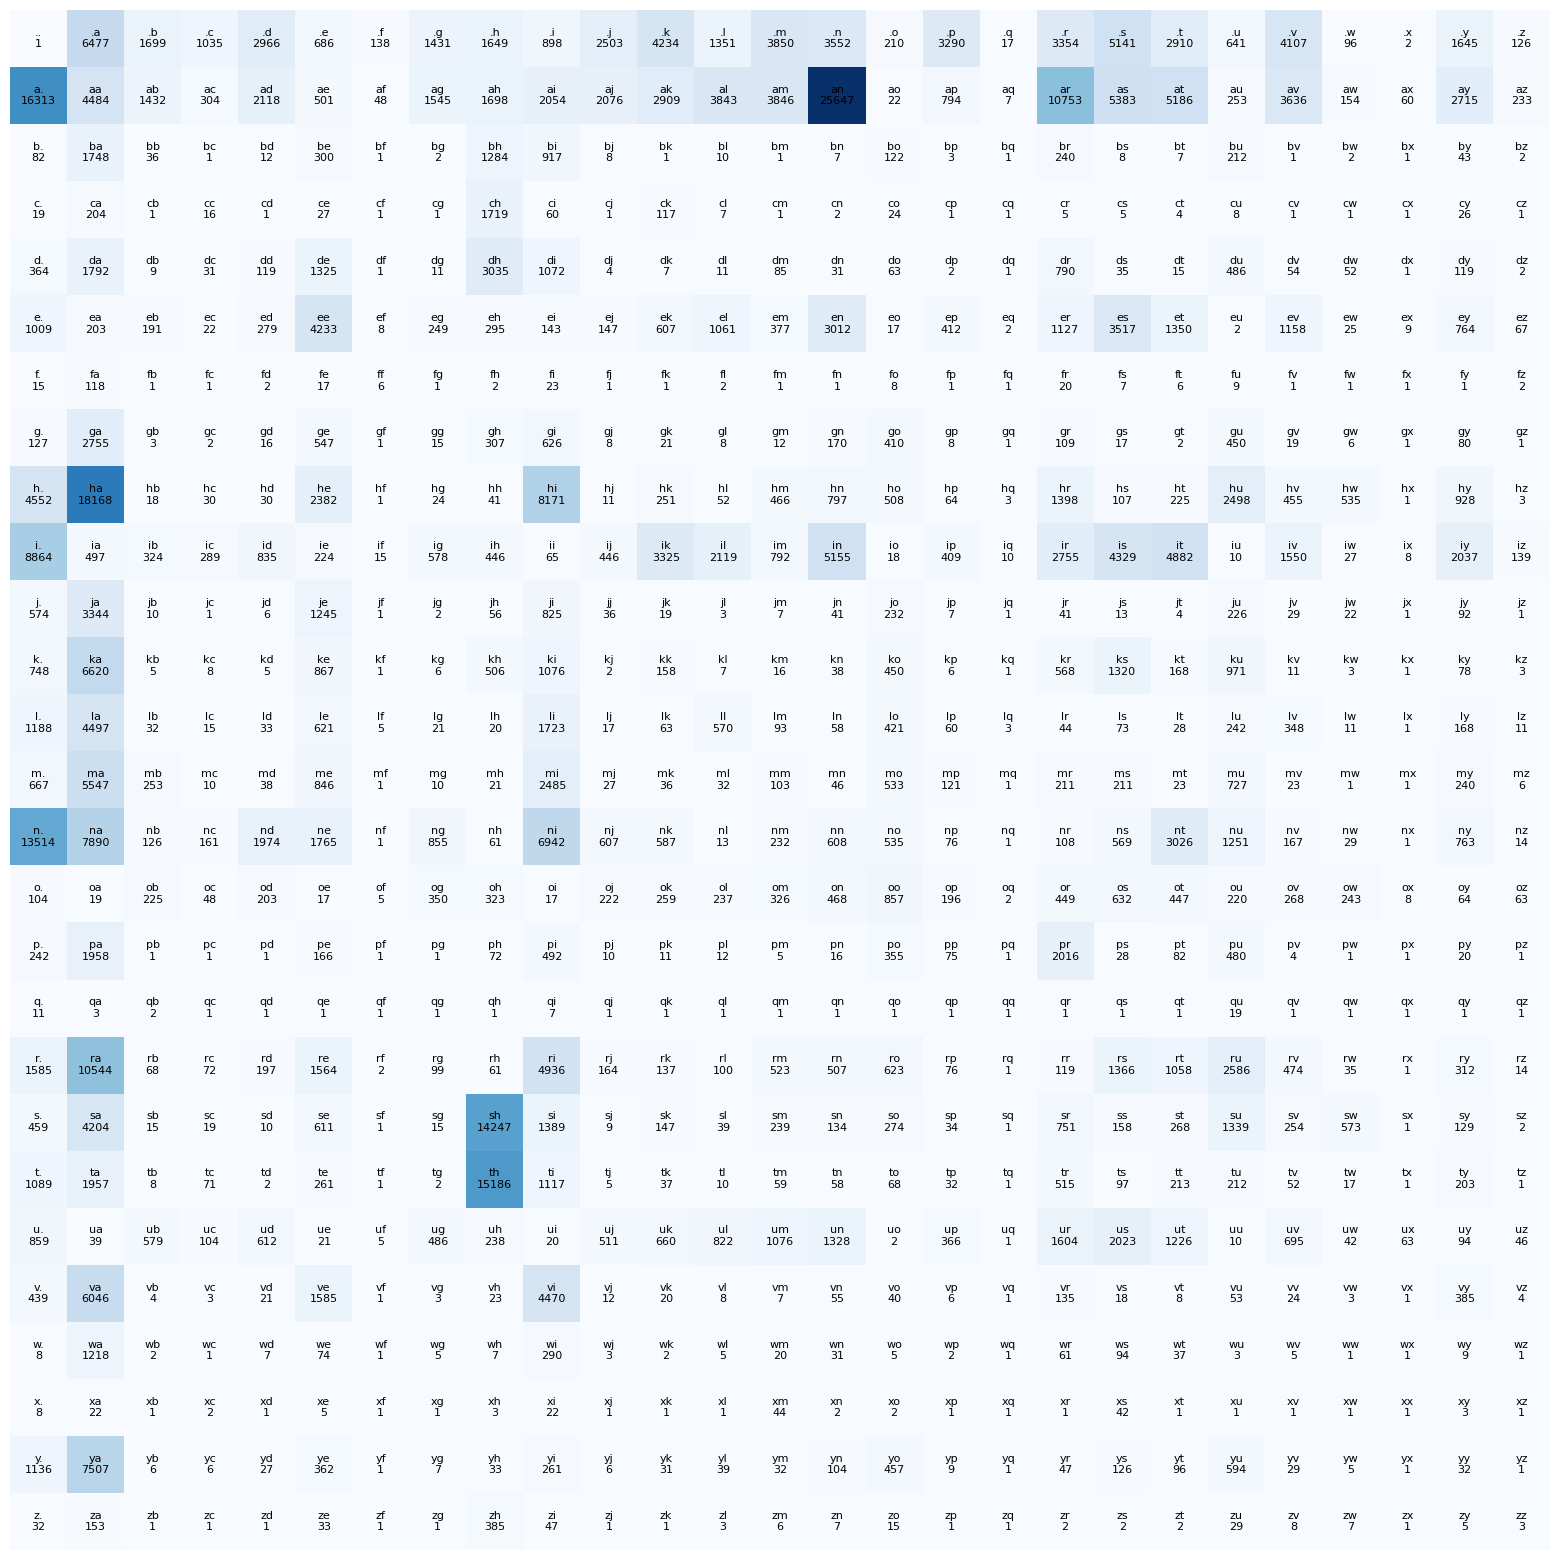

In [ ]:

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')  # Plot the tensor as an image

# Add text annotations to each cell
for i in range(27):  # Rows
    for j in range(27):  # Columns
        char_pair = f"{itos[i]}{itos[j]}"  # Combine characters from dictionaries
        value = int(N[i, j])  # Get the tensor value
        text = f"{char_pair}\n{value}"  # Combine character pair and value
        plt.text(j, i, text, ha='center', va='center', color='black', fontsize=8)

# Hide the axes
plt.axis('off')  # Turn off axes completely

# Display the plot
plt.show()

In [ ]:
P = N/N.sum(1,keepdim=True)
g = torch.Generator().manual_seed(23736367383)

In [ ]:
ix=0
out=[]
for i in range(5):
  name=''
  while True:
    ch = torch.multinomial(P[ix],1,generator=g)[0]
    name += itos[ch.item()]
    ix = ch
    if ch == 0:
      break
  out.append(name)

In [ ]:
out

['hingevavapran.', 'lkhananiya.', 'j.', 'shanilvafth.', 'sseshu.']

tensor([[1.8515e-05, 1.1992e-01, 3.1458e-02, 1.9163e-02, 5.4917e-02, 1.2702e-02,
         2.5551e-03, 2.6496e-02, 3.0532e-02, 1.6627e-02, 4.6344e-02, 7.8394e-02,
         2.5014e-02, 7.1284e-02, 6.5767e-02, 3.8882e-03, 6.0916e-02, 3.1476e-04,
         6.2101e-02, 9.5188e-02, 5.3880e-02, 1.1868e-02, 7.6043e-02, 1.7775e-03,
         3.7031e-05, 3.0458e-02, 2.3329e-03],
        [1.6644e-01, 4.5749e-02, 1.4610e-02, 3.1016e-03, 2.1609e-02, 5.1115e-03,
         4.8973e-04, 1.5763e-02, 1.7324e-02, 2.0956e-02, 2.1181e-02, 2.9679e-02,
         3.9209e-02, 3.9239e-02, 2.6167e-01, 2.2446e-04, 8.1009e-03, 7.1418e-05,
         1.0971e-01, 5.4921e-02, 5.2911e-02, 2.5813e-03, 3.7097e-02, 1.5712e-03,
         6.1216e-04, 2.7700e-02, 2.3772e-03],
        [1.6231e-02, 3.4600e-01, 7.1259e-03, 1.9794e-04, 2.3753e-03, 5.9382e-02,
         1.9794e-04, 3.9588e-04, 2.5416e-01, 1.8151e-01, 1.5835e-03, 1.9794e-04,
         1.9794e-03, 1.9794e-04, 1.3856e-03, 2.4149e-02, 5.9382e-04, 1.9794e-04,
         4.7506e-

In [ ]:

llh = 0
cc =0
for word in Names[:]:
  word = "."+word.lower()+"."
  for ch1, ch2 in zip(word, word[1:]):
    ix = stoi[ch1]
    iy = stoi[ch2]
    llh += -P[ix][iy].log()
    cc += 1
llh/cc

tensor(2.1749)

In [ ]:
xs,ys =[],[]
for word in Names[:]:
  word = "."+word.lower()+"."
  for ch1, ch2 in zip(word, word[1:]):
    xs.append(stoi[ch1])
    ys.append(stoi[ch2])
xs,ys = torch.tensor(xs),torch.tensor(ys)

In [ ]:
W = torch.randn((27,27),requires_grad=True)

In [ ]:
import torch.nn.functional as F
xsoh = F.one_hot(xs,num_classes=27).float()

In [ ]:
# Forward Pass
logits = xsoh @ W
counts = logits.exp() # same like N
probs = counts/counts.sum(1,keepdim=True)
yprobs = probs[torch.arange(probs.shape[0]),ys]
loss = -yprobs.log().mean()
loss

tensor(2.1892, grad_fn=<NegBackward0>)

In [ ]:
# Backword Pass
W.grad = None
loss.backward()
W.data += -50*W.grad

In [ ]:
import math

In [ ]:
for k in range(100):
  # Forward Pass
  logits = xsoh @ W
  counts = logits.exp() # same like N
  probs = counts/counts.sum(1,keepdim=True)
  yprobs = probs[torch.arange(probs.shape[0]),ys]
  loss = -yprobs.log().mean()
  print(loss.item())
  # Backword Pass
  W.grad = None
  loss.backward()
  W.data += -50*W.grad

2.366701126098633
2.2482669353485107
2.194265127182007
2.1807756423950195
2.1783156394958496
2.1782145500183105
2.178349256515503
2.1787874698638916
2.1791698932647705
2.1802072525024414
2.1807963848114014
2.182906150817871
2.183340549468994
2.1870176792144775
2.186229944229126
2.191433906555176
2.188292980194092
2.194305896759033
2.1891305446624756
2.1953415870666504
2.1893224716186523
2.19555401802063
2.189345359802246
2.1955783367156982
2.189342737197876
2.195577383041382
2.1893370151519775
2.195573091506958
2.189333438873291
2.195572853088379
2.1893320083618164
2.1955742835998535
2.189328670501709
2.195573091506958
2.1893253326416016
2.1955716609954834
2.189321994781494
2.1955699920654297
2.1893186569213867
2.1955678462982178
2.189314603805542
2.1955654621124268
2.1893115043640137
2.1955630779266357
2.189307928085327
2.195560932159424
2.1893045902252197
2.195559024810791
2.189301013946533
2.195556402206421
2.189297676086426
2.19555401802063
2.1892940998077393
2.1955509185791016
2.1